<a href="https://colab.research.google.com/github/nunososorio/bhs/blob/main/NSO_PracticalClass_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Training: The Role of Databases in Drug Discovery

By **Nuno S. Osório** 🖋️

👋 Welcome to this tutorial! We will explore how to access and use drug-related databases. We will focus on retrieving data from **ChEMBL** using their respective Python packages, and then analyze the retrieved data. This tutorial is designed to be run on jupyter notebook environments and includes exercises that involve running Python code. 🐍💻

You can access an interactive cloud version of the notebook here (https://colab.research.google.com/github/nunososorio/bhs/blob/main/NSO_PracticalClass_I.ipynb).

Let's dive in! 🏊‍♂️


## Introduction

The use of databases is crucial in the steps of **Target-to-Hit** and **Hit-to-Lead** in drug discovery. 🎯💊 These databases provide a wealth of information about potential drug targets and the compounds that could interact with these targets. Accessing and analyzing this data can help in the identification of potential new drugs. 🧪🔬

Accessing these databases can be done via their respective websites. However, for reproducible and large-scale analysis, accessing the database programmatically via code is more efficient. In this tutorial, we will guide you on how to do this. 🖥️📚

The **ChEMBL** database is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs. 🧬💡

The `chembl_webresource_client` is the official Python client library for accessing ChEMBL data. 🐍📦


## Setup
First, we need to install the necessary Python packages. Run the following commands in your environment:


In [ ]:
!pip install chembl_webresource_client


Now, import the library:

In [ ]:
from chembl_webresource_client.new_client import new_client


## Explore

Lets start by learning all types of data or information we can retreive from ChEMBL database using the chembl_webresource_client. You can list available data entities using the following code:

In [ ]:
available_resources = dir(new_client)
#available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]

available_resources


In Python, attributes that start with an underscore are typically used for internal purposes and are not meant to be accessed directly.

Lets peek into the 'molecule' data entity in the ChEMBL database:

In [ ]:
new_client.molecule

As you can see, it returns a dictionary containing a wealth of information about a specific molecule in the ChEMBL database. The keys in this dictionary represent different attributes of the molecule, and the values associated with these keys provide specific information about these attributes.

Here’s a brief explanation of some of the keys in the dictionary:

- **'atc_classifications'**: The Anatomical Therapeutic Chemical (ATC) classification system codes for the molecule.
- **'availability_type'**: The availability type of the molecule.
- **'biotherapeutic'**: Information about the biotherapeutic properties of the molecule.
- **'black_box_warning'**: Indicates if there is a black box warning for the molecule.
- **'molecule_chembl_id'**: The ChEMBL ID of the molecule.
- **'molecule_hierarchy'**: The hierarchy of the molecule in the ChEMBL database.
- **'molecule_properties'**: Various properties of the molecule, such as its molecular weight, number of hydrogen bond acceptors and donors, etc.
- **'molecule_structures'**: The structures of the molecule in various formats, such as SMILES, InChI, and molfile.
- **'molecule_type'**: The type of the molecule (e.g., ‘Small molecule’).
- **'structure_type'**: The type of the structure (e.g., ‘MOL’).
- **'pref_name'**: This stands for “preferred name”. It is the preferred name of the molecule in the ChEMBL database. If the value is None, it means that a preferred name has not been assigned or is not available for this molecule in the database.
- **'molecule_synonyms'**: This is a list of synonyms for the molecule. Synonyms are different names that can be used to refer to the same molecule. These could include names used in different databases, common names, scientific names, etc. If the list is empty, it means that no synonyms have been recorded or are available for this molecule in the database.



If we want to find a molecule by 'molecule_synonyms' name we can use:

In [ ]:
# Create a 'molecule' object that allows you to access the 'molecule' data entity in the ChEMBL database.
molecule = new_client.molecule

# Use the 'filter' method of the 'molecule' object to retrieve all molecules whose synonyms name is 'viagra'.
# The 'iexact' lookup is used to perform case-insensitive exact match.
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra')

# 'mols' now contains a list of all molecules in the ChEMBL database whose preferred name is 'aspirin'.
mols



Not easy to read... Don't worry you can convert the 'mols' object into a pandas DataFrame easier reading and manipulation. Here’s how you can do it:

In [ ]:
import pandas as pd
mols_df = pd.DataFrame.from_records(mols)
mols_df


You can export it into an excel file if you like:

In [ ]:
mols_df.to_excel('mols_df.xlsx', index=False)
from google.colab import files
files.download('mols_df.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🚀 Scenario-based Exercise

**Scenario**: You’re a researcher 🔬 involved in the exciting world of drug discovery and development. You’ve just received a recently synthesized compound from a collaborating chemical lab. The compound was sent via mail 📬, and intriguingly, it only included a printed image of the structure of the compound.

**Your Mission**: Your task, should you choose to accept it, involves a few critical steps:
1. Convert the structure diagram to a SMILES string. This will test your ability to interpret chemical structure diagrams.
2. Search the ChEMBL database using the SMILES string. This will require your skills in accessing databases programmatically.
3. Determine if the compound already exists in the database and if it has relevant annotation. This will challenge your data analysis skills.

Remember, the goal of these exercises is to familiarize you with accessing drug-related databases programmatically. This skill is crucial for reproducible and large-scale analysis in the steps of drug discovery.

So, are you ready to embark on this journey? Let's dive in! 💻🎯

This is the image of the compound:

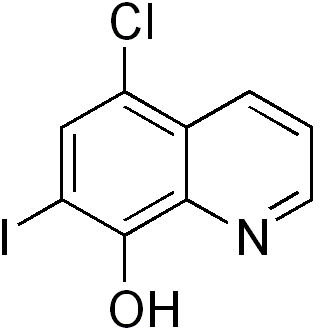



First step: Convert the Kekulé diagram to a SMILES string. You can use several different software for that, including:
https://cactus.nci.nih.gov/cgi-bin/osra/index.cgi


Now that you got the SMILES ou can use it to query ChEMBL database:

In [ ]:
# ENTER THE SMILES IN THE X BELOW "Oc1c(I)cc(Cl)c2cccnc12"
canonical_smiles= X
smiles_mol = molecule.filter(molecule_structures__canonical_smiles=canonical_smiles)
smiles_mol_df = pd.DataFrame.from_records(smiles_mol)
smiles_mol_df.to_excel('mols_df.xlsx', index=False)
from google.colab import files
files.download('mols_df.xlsx')
smiles_mol_df

## What have you found about the chemical compound that was sent?

## 🎁 Bonus

Can you create an excel file with all the withdrawn drugs listed on ChEMBL?

In [ ]:
# Use the 'filter' method of the 'molecule' object to retrieve all molecules that have been withdrawn.
withdrawn_mols = molecule.filter(withdrawn_flag=True)
withdrawn_mol_df = pd.DataFrame.from_records(withdrawn_mols)
withdrawn_mol_df.to_excel('withdrawn_mol_df.xlsx', index=False)
from google.colab import files
files.download('withdrawn_mol_df.xlsx')

Canonical SMILES?

In the context of chemical compounds and SMILES (Simplified Molecular Input Line Entry System), the canonical SMILES is a unique notation that represents the structure of the compound. There can be many valid SMILES notations for a single molecule because the SMILES notation can vary based on the starting atom and the traversal path. The canonical SMILES is a specific SMILES notation that is chosen based on certain rules, and it is the same regardless of the way the molecule is drawn or represented. That is why it is the form used in databases. the rdkit library can be used to create canonical SMILES.

In [ ]:
# install the necessary tool
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem

# The SMILES string of the molecule
smiles_string = "C/C4=C/3CCC(C)(COc2ccc(CC1SC(=O)*C1=O)cc2)OC3C(C)C(C)C4c5c[nH]5"

# Create a RDKit molecule object from the SMILES string
molecule = Chem.MolFromSmiles(smiles_string)

# Get the canonical SMILES string
canonical_smiles = Chem.MolToSmiles(molecule, isomericSmiles=True)

print(canonical_smiles)

